# SarcGraphTools - TimeSeries

All demos are availble on GitHub at https://github.com/Sarc-Graph/sarcgraph/tree/main/tutorials.

To run demos with `jupyter notebook` check [Installation Guide](https://sarc-graph.readthedocs.io/en/latest/installation.html).

SarcGraph applies Gaussian Process Regression (GPR) on the recovered sarcomere characteristics to reduce the noise and predict values for missing frames.

In this notebook we provide a tutorial on how to use the SarcGraph package using demos and examples. The focus is on the ``SarcGraphTools.TimeSeries`` class in the ``sg_tools`` module.

## Initialization

Methods in the ``SarcGraphTools`` class need the information that will be saved by running ``SarcGraph.sarcomere_detection()``.

To showcase this we use ``samples/sample_1.avi``.

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sarcgraph.sg import SarcGraph

sg = SarcGraph(output_dir='../tutorial-results', file_type='video')
sarcomeres, _ = sg.sarcomere_detection(file_path='../samples/sample_1.avi')

sarcomeres.sample(5)

Frame 79: 91 trajectories present.


,frame,sarc_id,x,y,length,width,angle,zdiscs
1084,44,13,79.723682,304.530619,25.575665,25.025639,1.120157,"-32,-29"
3127,7,39,246.456740,284.942221,9.153244,8.877143,2.403977,"1,22"
2900,20,36,339.118692,254.452540,26.845448,24.428691,1.736604,"-7,-6"
2892,12,36,338.549393,254.152132,26.593946,23.480465,1.696647,"-7,-6"
1777,17,22,244.637913,391.190604,22.439830,31.272100,2.701741,"-20,-3"


By dafault ``save_output=True`` in ``sg.sarcomere_detection()`` and the following information will be saved in ``../tutorial-results``:

- raw video frames (grayscale)
- filtered video frames
- zdisc contours
- segmented zdiscs information
- tracked zdiscs information
- detected sarcomeres information

## Gaussian Process Regression (GPR)

In the subsequent step, following the execution of ``sg.sarcomere_detection()``, we employ the ``SarcGraphTools.TimeSeries`` class to perform Gaussian Process Regression (GPR) on the extracted sarcomere features. This serves two primary objectives: (1) mitigating noise in the time series data, and (2) estimating values for absent data in certain frames. It is crucial to note that without this step, the methods within the ``Analysis`` class in ``SarcGraphTools`` will be rendered inoperative.

<div class="alert alert-warning">
<strong>Warning:</strong> This process may take a long time depending on the number of frames and sarcomeres.
</div>

In [34]:
from sarcgraph.sg_tools import SarcGraphTools

sg_tools = SarcGraphTools(input_dir='../tutorial-results')
sarcomeres_gpr = sg_tools.time_series.sarcomeres_gpr()

sarcomeres_gpr.sample(5)

,frame,sarc_id,x,y,length,width,angle,zdiscs,length_norm
1174,54,14,74.215790,149.345596,26.520269,24.958379,1.898713,"-31,-30",0.023551
2616,56,32,325.079710,305.235156,25.963115,22.043983,1.968080,"-12,-10",0.013478
2147,67,26,279.935911,360.187433,22.818302,23.902904,2.387021,"-18,-16",-0.019503
5194,74,64,265.503302,168.711924,15.761259,9.662119,1.891021,"38,39",0.092063
805,5,10,70.720047,175.724353,26.085434,23.140917,1.793664,"-34,-31",-0.006830


Through this illustration, we demonstrate the efficacy of Gaussian Process Regression (GPR) in minimizing noise associated with the detected length of a specific sarcomere across multiple frames.

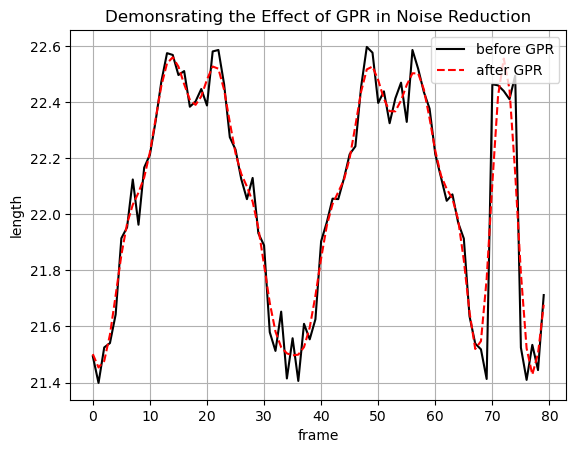

In [53]:
import matplotlib.pyplot as plt

ax = plt.axes()
ax.grid('on')
ax.set_title('Demonsrating the Effect of GPR in Noise Reduction')
ax.set_ylabel('length')
ax.set_xlabel('frame')

# Note that sarcomeres contrains information of detected sarcomeres before GPR
# and sarcomeres_gpr contains the same information after applying GPR
plt.plot(sarcomeres[sarcomeres.sarc_id == 1].length.to_numpy(), color='k', label='before GPR')
plt.plot(sarcomeres_gpr[sarcomeres_gpr.sarc_id == 1].length.to_numpy(), 'r--', label='after GPR')

plt.legend()

To show the effect of GPR on missing data prediction, we use a different video sample ``samples/sample_2.avi``.

In [55]:
sg = SarcGraph(output_dir='../tutorial-results-2', file_type='video')
sarcomeres, _ = sg.sarcomere_detection(file_path='../samples/sample_2.avi')

sg_tools = SarcGraphTools(input_dir='../tutorial-results-2')
sarcomeres_gpr = sg_tools.time_series.sarcomeres_gpr()

Frame 145: 715 trajectories present.


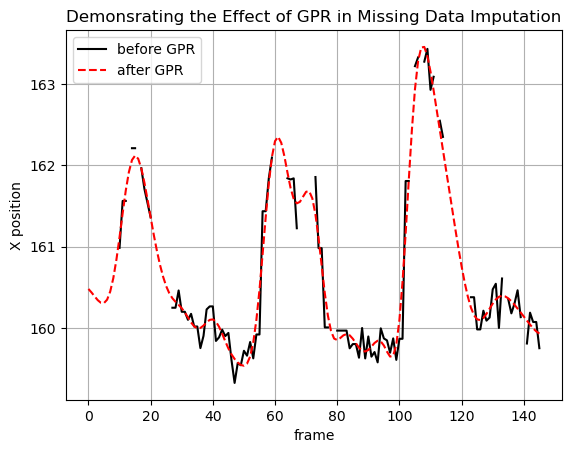

In [56]:
import matplotlib.pyplot as plt

ax = plt.axes()
ax.grid('on')
ax.set_title('Demonsrating the Effect of GPR in Missing Data Imputation')
ax.set_ylabel('X position')
ax.set_xlabel('frame')

# Note that sarcomeres contrains information of detected sarcomeres before GPR
# and sarcomeres_gpr contains the same information after applying GPR
plt.plot(sarcomeres[sarcomeres.sarc_id == 3].x.to_numpy(), color='k', label='before GPR')
plt.plot(sarcomeres_gpr[sarcomeres_gpr.sarc_id == 3].x.to_numpy(), 'r--', label='after GPR')

plt.legend()

This saves sarcomeres info with GPR as ``sarcomeres_gpr.csv`` in the specified input directory ``input_dir`` if ``save_results=True`` in ``SarcGraphTools``.

**Note**

Additionally, ``sarcomeres_gpr()`` computes normalized length for each sarcomeres over all frames into ``length_norm`` column.